
# **Unveiling Gender Bias: Statistical Analyses of Salary Prediction Data**


Gender bias refers to the unequal and often unjust treatment or representation of individuals based on their gender. This pervasive issue can manifest in various aspects of life, such as education, employment, healthcare, and social interactions. Whether intentional or unintentional, gender bias is deeply ingrained in societal norms, perpetuated stereotypes, and historical practices.

To systematically identify and evaluate gender bias, statistical analyses are frequently employed, particularly when examining datasets like the one used in this analysis, available at https://www.kaggle.com/datasets/mohithsairamreddy/salary-data. Statistical approaches aid in uncovering patterns or disparities that may indicate unequal treatment based on gender.

Here are some commonly used statistical methods to assess gender bias:

In [ ]:
# Packages for EDA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import entropy

# **1. Dataset Description**

In [ ]:
# Load The data
salary_df = pd.read_csv("/content/sample_data/Salary_Data.csv")
salary_df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [ ]:
# Generate summary statistics for the dataset
dataset_summary = salary_df.describe()

# Display the summary statistics
print("Summary Statistics of the Salary Prediction Dataset:")
dataset_summary

Summary Statistics of the Salary Prediction Dataset:


,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [ ]:
# Display data types of each column
salary_df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [ ]:
# Check for null values
null_values = salary_df.isnull().sum()

# Display the null values count for each column
print(null_values)

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [ ]:
# Drop rows with null or NaN values
salary_df = salary_df.dropna()

# Check for null values
null_values = salary_df.isnull().sum()

# Display the null values count for each column
print(null_values)


Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


# **1. Exploratory Data Analysis (EDA)**


Exploratory Data Analysis (EDA) serves as a crucial method for identifying and mitigating bias within data. An effective approach involves employing visualizations to scrutinize the distribution of features and the target variable among diverse demographic groups.

**Utilizing** tools such as histograms, box plots, and density plots unveils patterns and disparities, facilitating a comprehensive understanding of potential sources of bias in the dataset. This method not only aids in recognizing existing imbalances but also provides insights for implementing corrective measures.

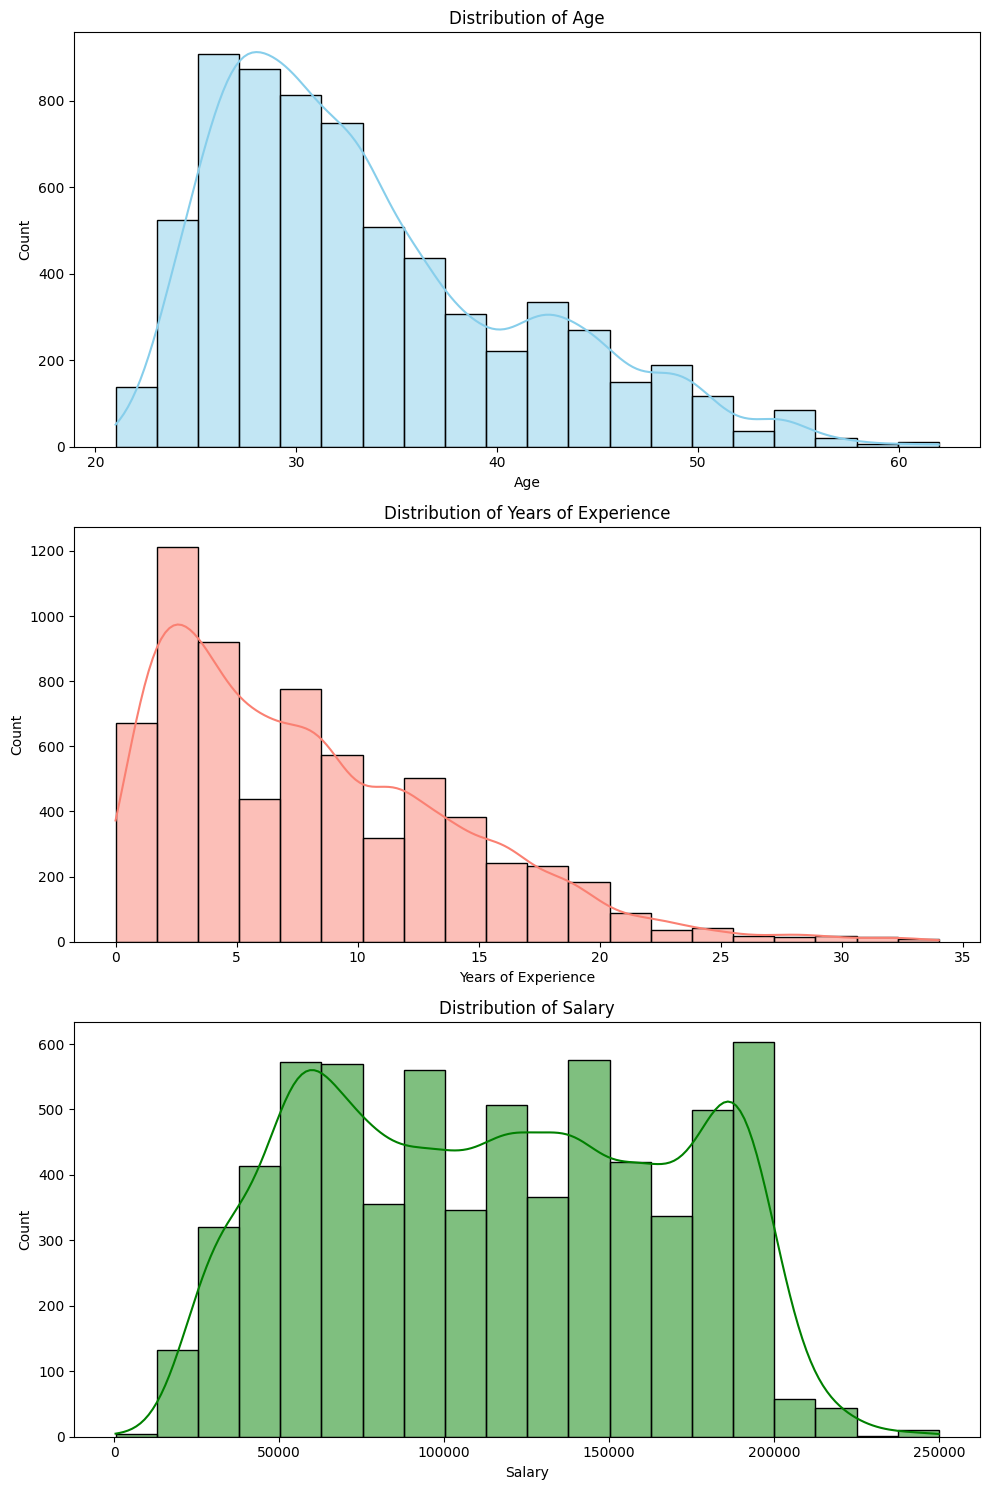

In [ ]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot histograms for Age, Years of Experience, and Salary
sns.histplot(salary_df['Age'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Age')

sns.histplot(salary_df['Years of Experience'], bins=20, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Years of Experience')

sns.histplot(salary_df['Salary'], bins=20, kde=True, ax=axes[2], color='green')
axes[2].set_title('Distribution of Salary')

# Adjust layout
plt.tight_layout()
plt.show()


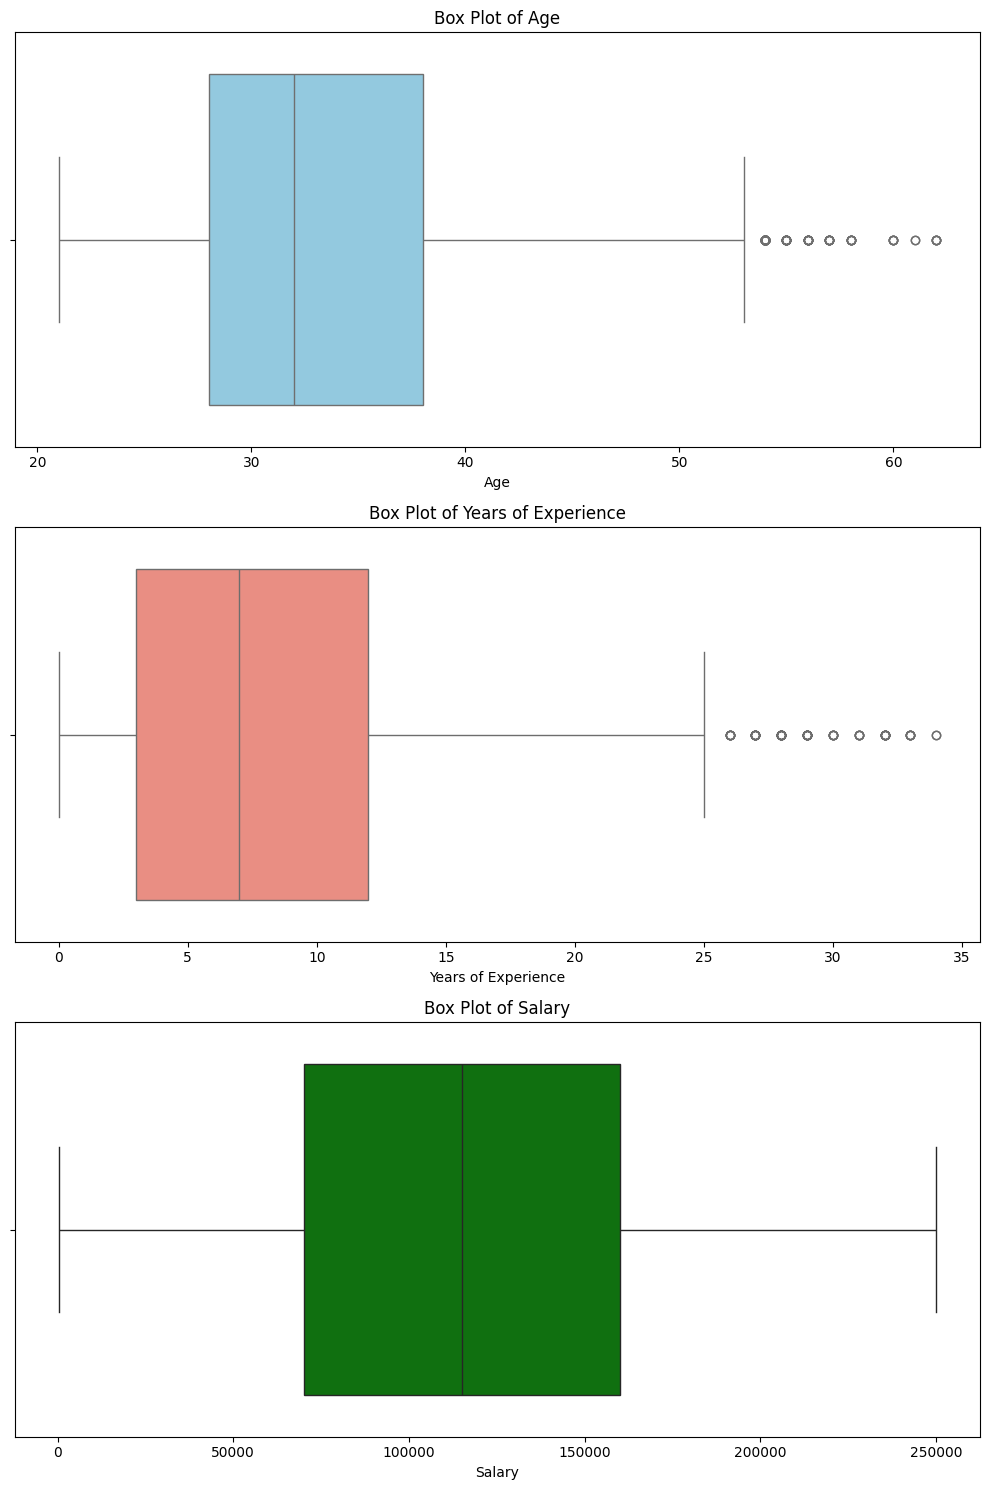

In [ ]:

# Box plots for Age, Years of Experience, and Salary
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

sns.boxplot(x=salary_df['Age'], ax=axes[0], color='skyblue')
axes[0].set_title('Box Plot of Age')

sns.boxplot(x=salary_df['Years of Experience'], ax=axes[1], color='salmon')
axes[1].set_title('Box Plot of Years of Experience')

sns.boxplot(x=salary_df['Salary'], ax=axes[2], color='green')
axes[2].set_title('Box Plot of Salary')

# Adjust layout
plt.tight_layout()
plt.show()


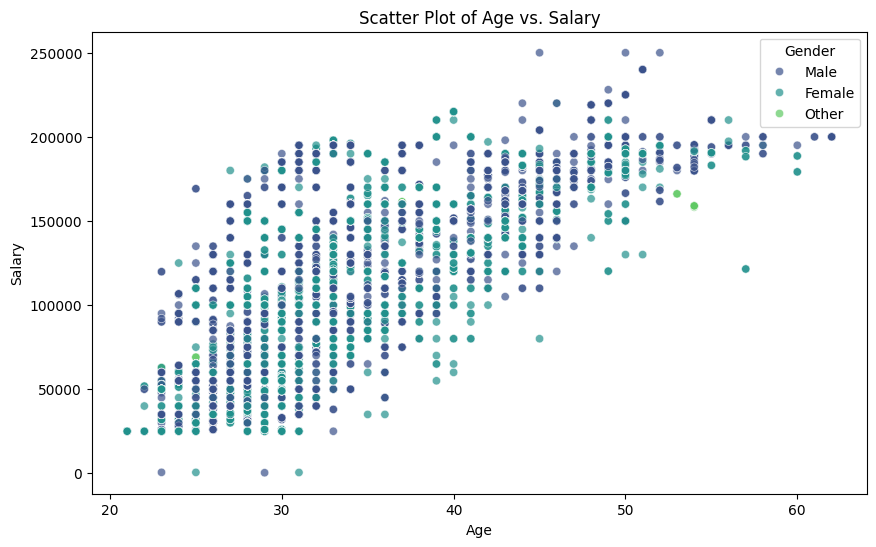

In [ ]:
# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Scatter plot for Age and Salary
sns.scatterplot(x='Age', y='Salary', data=salary_df, hue='Gender', palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Age vs. Salary')

# Show plot
plt.show()

# **Gender Related Visualizations**

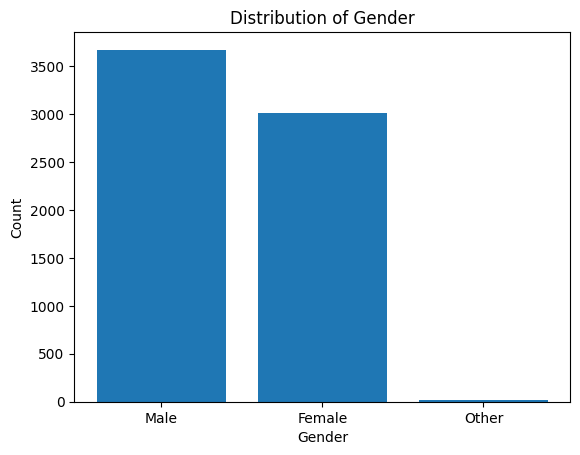

In [ ]:
# Extract the counts of each gender from the 'Gender' column in the salary_df DataFrame
gender_counts = salary_df['Gender'].value_counts()

# Plot a bar chart to visualize the distribution of genders
plt.bar(gender_counts.index, gender_counts)

# Set labels for the x and y axes, and provide a title for the plot
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

# Display the plot
plt.show()


<ipython-input-12-0a49a10e429e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Years of Experience', data=salary_df, palette='Set2')


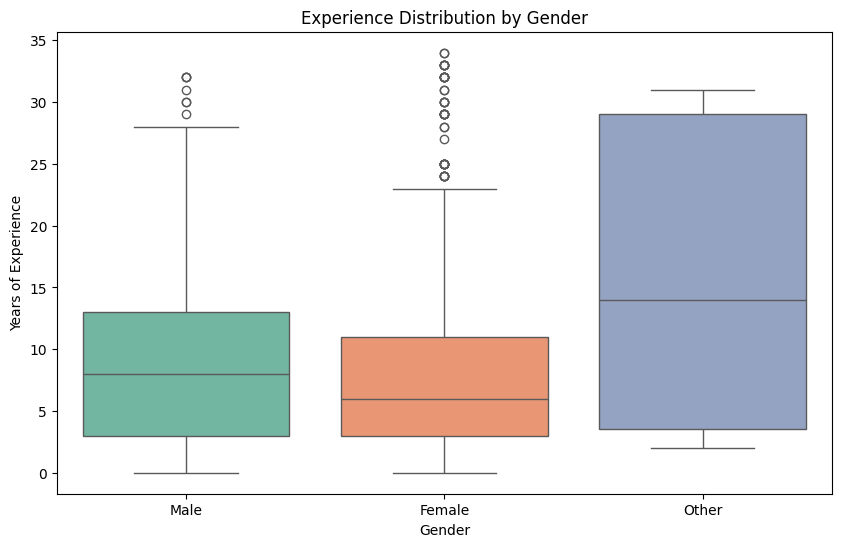

In [ ]:
# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Box plot for Experience grouped by Gender
sns.boxplot(x='Gender', y='Years of Experience', data=salary_df, palette='Set2')
plt.title('Experience Distribution by Gender')

# Show plot
plt.show()


<ipython-input-13-fd3fdf332366>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Age', data=salary_df, palette='Set2')


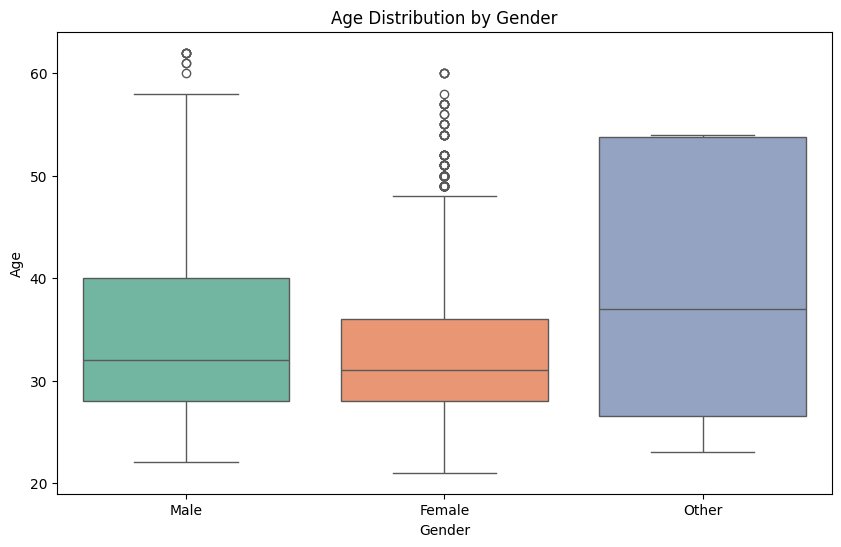

In [ ]:
# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Box plot for Age grouped by Gender
sns.boxplot(x='Gender', y='Age', data=salary_df, palette='Set2')
plt.title('Age Distribution by Gender')

# Show plot
plt.show()


<ipython-input-14-3586082b848e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Salary', data=salary_df, palette='Set2')


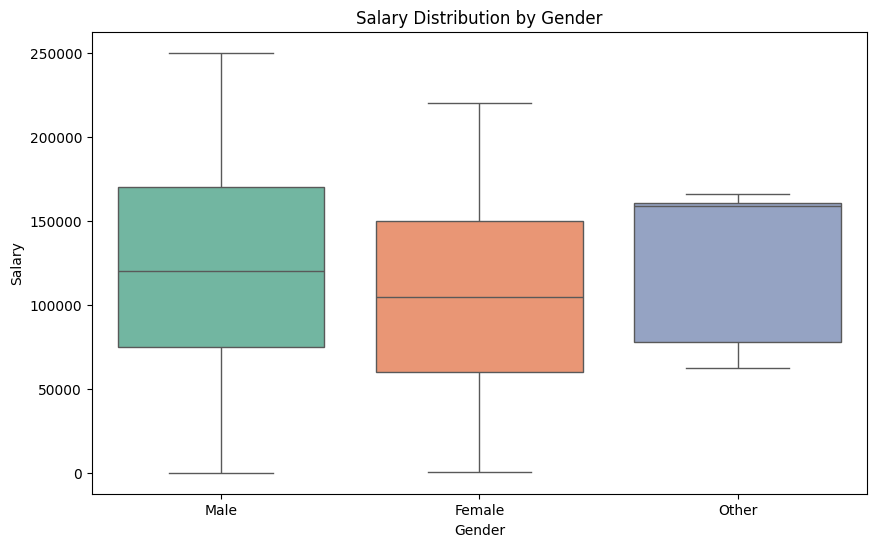

In [ ]:
# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Box plot for Salary grouped by Gender
sns.boxplot(x='Gender', y='Salary', data=salary_df, palette='Set2')
plt.title('Salary Distribution by Gender')

# Show plot
plt.show()



# **2. Descriptive Statistics**

Compute summary statistics for different demographic groups. Look at mean, median, standard deviation, and quartiles for features and the target variable across various groups.


**Interpretation of the Results:**

For the 'Female' group:

* Count: 3013 observations
* Mean age: Approximately 32.63 years
* Median age: 31 years
* Standard deviation: Approximately 6.98 years

For the 'Male' group:

* Count: 3671 observations
* Mean age: Approximately 34.42 years
* Median age: 32 years
* Standard deviation: Approximately 7.98 years

For the 'Other' group:

* Count: 14 observations
* Mean age: Approximately 39.57 years
* Median age: 37 years
* Standard deviation: Approximately 13.38 years


These statistics provide insights into the age distribution within each gender group, helping to understand the central tendency and variability of ages across different gender categories.

In [ ]:
# Group the DataFrame by 'Gender' and select the 'Age' column
gender_groups = salary_df.groupby('Gender')['Age']

# Calculate summary statistics for each gender group (count, mean, median, std)
summary_statistics = gender_groups.agg(['count', 'mean', 'median', 'std'])

# Display the summary statistics
print("Summary Statistics for Age by Gender:")
print(summary_statistics)

Summary Statistics for Age by Gender:
        count       mean  median        std
Gender                                     
Female   3013  32.626286    31.0   6.976178
Male     3671  34.418415    32.0   7.979936
Other      14  39.571429    37.0  13.380320


**Interpretation of the Results:**

For the 'Female' group:

* Count: 3013 observations

* Mean salary: Approximately $107,889

* Median salary: $105,000

* Standard deviation: Approximately $52,724

For the 'Male' group:

* Count: 3671 observations

* Mean salary: Approximately $121,396

* Median salary: $120,000

* Standard deviation: Approximately $52,099

For the 'Other' group:

* Count: 14 observations

* Mean salary: Approximately $125,870

* Median salary: $158,610

*  Standard deviation: Approximately $44,242


These statistics provide insights into the salary distribution within each gender group, helping to understand the central tendency and variability of salaries across different gender categories.






In [ ]:
# Group the DataFrame by 'Gender' and select the 'Salary' column
gender_groups = salary_df.groupby('Gender')['Salary']

# Calculate summary statistics for each gender group (count, mean, median, std)
summary_statistics = gender_groups.agg(['count', 'mean', 'median', 'std'])

# Display the summary statistics
print("Summary Statistics for Salary by Gender:")
print(summary_statistics)



Summary Statistics for Salary by Gender:
        count           mean    median           std
Gender                                              
Female   3013  107888.998672  105000.0  52723.610035
Male     3671  121395.697630  120000.0  52098.626225
Other      14  125869.857143  158610.0  44242.382776


# **3. Hypothesis Testing**

Formulate null and alternative hypotheses and perform hypothesis tests to determine if there is enough evidence to reject the null hypothesis. Common tests include t-tests, chi-square tests, ANOVA.


**Example: Independent Two-Sample T-Test**

**Objective:**

Test whether there is a significant difference in the average salary between two groups (e.g., Group A and Group B).

**Hypotheses:**

Null Hypothesis (H0): The mean salary of Group A is equal to the mean salary of Group B.

Alternative Hypothesis (H1): The mean salary of Group A is different from the mean salary of Group B.

**Here's an interpretation of the results:**

T-Statistic: 10.49

P-Value: 1.53e-25 (very close to zero)


The t-test results in a very low p-value (much smaller than the significance level of 0.05), indicating strong evidence against the null hypothesis. The null hypothesis assumes no difference in salaries between male and female groups. Since the p-value is extremely low, we reject the null hypothesis. Therefore, there is enough statistical evidence to suggest a significant difference in salaries between genders.

In [ ]:
# Extract salaries for each gender group
male_salaries = salary_df[salary_df['Gender'] == 'Male']['Salary']
female_salaries = salary_df[salary_df['Gender'] == 'Female']['Salary']

# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(male_salaries, female_salaries)

# Print results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Set significance level
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. There is enough evidence to suggest a significant difference in salaries between genders.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest a significant difference in salaries between genders.")


T-Statistic: 10.489305680117718
P-Value: 1.5264743340303035e-25
Reject the null hypothesis. There is enough evidence to suggest a significant difference in salaries between genders.


# **4. Effect size**

uantifies the magnitude of a relationship or the difference between groups, providing a measure of practical significance. One commonly used effect size for comparing means is Cohen's d.


Effect size, as quantified by Cohen's d, provides a meaningful measure of the practical significance of a relationship or difference between groups. The interpretation of Cohen's d is as follows:

**Small effect:** 0.2 <= |d| < 0.5

**Medium effect:** 0.5 <= |d| < 0.8

**Large effect:** |d| >= 0.8



In simpler terms, a small effect size indicates a modest impact, a medium effect size suggests a moderate impact, and a large effect size signifies a substantial impact.

**Resul:** The Cohen's d value of 0.2579 suggests a small effect size. In practical terms, this means that the observed difference in salaries between genders is small and may not have substantial practical significance. Effect sizes help interpret the magnitude of differences, providing context beyond statistical significance.

In [ ]:
# Extract salaries for each gender group
male_salaries = salary_df[salary_df['Gender'] == 'Male']['Salary']
female_salaries = salary_df[salary_df['Gender'] == 'Female']['Salary']

# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(male_salaries, female_salaries)

# Calculate Cohen's d
mean_difference = male_salaries.mean() - female_salaries.mean()
pooled_std_dev = ((len(male_salaries) - 1) * male_salaries.var() + (len(female_salaries) - 1) * female_salaries.var()) / (len(male_salaries) + len(female_salaries) - 2)
cohen_d = mean_difference / (pooled_std_dev ** 0.5)

# Print Cohen's d
print(f"Cohen's d: {cohen_d}")


Cohen's d: 0.2578536030939302


# **5. Theil Index**


Description: The Theil Index measures the overall inequality in a dataset, including both within-group and between-group disparities.

Calculation: It considers entropy within groups and overall entropy.

Interpretation: Higher values indicate higher inequality or bias.

**Results:**

**Theil Index for Male (8.11):** This value indicates the level of inequality in salaries among males. A higher Theil Index suggests greater inequality in salary distribution within the male group.

**Theil Index for Female (7.88):** Similarly, this value represents the level of inequality in salaries among females. A higher Theil Index implies more significant disparities in salary distribution within the female group.

**Comparing these values**, the Theil Index for males (8.11) is slightly higher than that for females (7.88). This suggests that there may be a slightly higher level of inequality in salary distribution among males compared to females in the given dataset.

In [ ]:
# Extract salary values for each gender group
male_salaries = salary_df[salary_df['Gender'] == 'Male']['Salary']
female_salaries = salary_df[salary_df['Gender'] == 'Female']['Salary']

# Calculate Theil Index for each group
theil_male = entropy(male_salaries)
theil_female = entropy(female_salaries)

# Display Theil Index values
print(f"Theil Index for Male: {theil_male}")
print(f"Theil Index for Female: {theil_female}")


Theil Index for Male: 8.109797060138703
Theil Index for Female: 7.883871535489255


# **6. Demographic Parity**

Demographic parity focuses on ensuring that the percentage of positive outcomes is roughly equal across different groups.

 It seeks to ensure that decisions made by the model are not influenced by protected attributes like gender, race, etc.


**Results:**

**Demographic Parity for Male (0.597):** This value indicates that approximately 59.7% of males in the dataset have salaries above the $100,000 threshold.


**Demographic Parity for Female (0.522):** This value indicates that approximately 52.2% of females in the dataset have salaries above the $100,000 threshold.
Comparison:

The demographic parity for males is higher (0.597) compared to females (0.522).
This suggests that a larger proportion of males in the dataset have salaries above $100,000 compared to females.

In [ ]:
# Set a salary threshold
salary_threshold = 100000

# Create a binary outcome variable indicating whether the salary is above the threshold
salary_df.loc[:, 'Outcome'] = (salary_df['Salary'] > salary_threshold).astype(int)

# Assuming 'Male' and 'Female' are the gender groups
male_data = salary_df[salary_df['Gender'] == 'Male']
female_data = salary_df[salary_df['Gender'] == 'Female']

# Calculate Demographic Parity
parity_male = male_data['Outcome'].mean()
parity_female = female_data['Outcome'].mean()

# Display the results
print(f"Demographic Parity for Male: {parity_male}")
print(f"Demographic Parity for Female: {parity_female}")




Demographic Parity for Male: 0.5965676927267775
Demographic Parity for Female: 0.5217391304347826


<ipython-input-17-5af2c9baff1f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_df.loc[:, 'Outcome'] = (salary_df['Salary'] > salary_threshold).astype(int)


# **7. Disparate Impact**

Disparate impact measures the difference in outcomes between different groups, such as genders. It's commonly used in the context of hiring, lending, or any decision-making process where fairness is critical. A value close to 1 indicates fairness, while values significantly deviating from 1 may suggest disparate impact.


**Interpretation of the result:**

**For Males:**The Disparate Impact is 1.059, suggesting a slightly higher outcome rate compared to the overall dataset. It could mean that, on average, males are more likely to be predicted as having a salary above the threshold.


**For Females:** The Disparate Impact is 0.926, indicating a slightly lower outcome rate compared to the overall dataset. It could mean that, on average, females are less likely to be predicted as having a salary above the threshold.


It's important to note that while Disparate Impact provides a quantitative measure, interpreting its practical significance also requires considering the context of the specific application and any legal or ethical thresholds that may be in place.







In [ ]:
# Assuming 'Male' and 'Female' are the gender groups
male_data = salary_df[salary_df['Gender'] == 'Male']
female_data = salary_df[salary_df['Gender'] == 'Female']

# Calculate Disparate Impact for Male and Female groups
disparate_impact_male = male_data['Outcome'].mean() / salary_df['Outcome'].mean()
disparate_impact_female = female_data['Outcome'].mean() / salary_df['Outcome'].mean()

# Display the results
print(f"Disparate Impact for Male: {disparate_impact_male}")
print(f"Disparate Impact for Female: {disparate_impact_female}")


Disparate Impact for Male: 1.0593346781240602
Disparate Impact for Female: 0.9264604177232698


# **8. Regression Analysis**


Regression analysis is employed to assess coefficients, offering insights into the influence of gender on the outcome variable. This analytical approach allows for a deeper understanding of how gender contributes to variations in the dependent variable, shedding light on the specific impact and significance of gender-related factors.

The Ordinary Least Squares (OLS) regression results provide insights into the relationship between various factors and the 'Salary' outcome. Here's an interpretation of the key elements:

**R-squared and Adjusted R-squared**: The R-squared value (0.667) indicates that approximately 66.7% of the variability in salary can be explained by the model. The adjusted R-squared considers the number of predictors in the model, adjusting for potential overfitting.

**F-statistic and Prob (F-statistic):** The F-statistic (3358) tests the overall significance of the model. A low p-value (0.00) suggests that at least one variable in the model significantly contributes to explaining the variance in salary.

**Coefficients:**

* Constant (Intercept): The intercept is $48,760. This represents the estimated salary when all other variables are zero (which may not be practically meaningful).

* Age: Each additional year of age is associated with a decrease of approximately $1,896 in salary.

* Years of Experience: An additional year of experience corresponds to an increase of about $9,260 in salary.

* Gender_Male: Being male is associated with an increase in salary of approximately $58,090 compared to the reference category (which is likely 'Gender_Female').

* Gender_Female: Being female is associated with a salary increase of approximately $52,270 compared to the reference category (likely 'Gender_Male').
Statistical Significance (P>|t|): All coefficients have low p-values (0.000), indicating statistical significance. Therefore, age, years of experience, and both gender categories are statistically significant predictors of salary.

**Omnibus, Durbin-Watson, Jarque-Bera, Skew, Kurtosis:** These statistics provide information about the normality and autocorrelation of residuals. In this case, the model assumptions seem reasonable, with low omnibus and Jarque-Bera values indicating normality.


In summary, the regression model suggests that age, years of experience, and gender significantly influence salary. The coefficients for 'Gender_Male' and 'Gender_Female' indicate the estimated salary difference between male and female, with both being statistically significant.


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Replace 'Outcome' with the actual column name you want to predict
outcome_variable = 'Salary'

# Create dummy variables for the 'Gender' column
df = pd.get_dummies(salary_df, columns=['Gender'], drop_first=True)

# Create 'Gender_Female' column and set it to 0 for all rows
df['Gender_Female'] = 0

# Set 'Gender_Female' to 1 where 'Gender' is 'Female'
df.loc[salary_df['Gender'] == 'Female', 'Gender_Female'] = 1

# Specify the independent variables (features) and the dependent variable (outcome)
independent_vars = ['Age', 'Years of Experience', 'Gender_Male', 'Gender_Female']
X = df[independent_vars]
y = df[outcome_variable]

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     3358.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:01:34   Log-Likelihood:                -78651.
No. Observations:                6698   AIC:                         1.573e+05
Df Residuals:                    6693   BIC:                         1.573e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.876e+04   8

Addressing bias in datasets is a crucial aspect of ensuring fairness in various applications. There are several methods to identify and mitigate bias in data.

The choice of method depends on the specific context, nature of the data, and the goals of fairness in the application. Combining multiple methods might offer a more comprehensive approach to identifying and mitigating bias.